# Part 8 -- Latent Semantic Analysis (Exploring Words)

Exploring words and identifying top features.

**Load lib codes**

In [1]:
from os import chdir
chdir('/home/jovyan/work/Portfolio/Analyzing_Unstructured_Data_for_Finance/')

from lib import *
# suppress_warnings()

In [83]:
tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/8.2.1.tfidf_vectorizer.pickle')

In [84]:
tfidf_word_index = tfidf.get_feature_names()

In [38]:
tfidf.get_feature_names()[-10:]

['yup',
 'zachbraff',
 'zero',
 'zerohedge',
 'zim',
 'zimbabwe',
 'zone',
 'zschneeweiss',
 'zuckerberg',
 'zuma']

In [77]:
SVD = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/8.2.1.SVD_transformer.pickle')

In [7]:
SVD.components_.shape

(300, 6369)

In [9]:
X = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/4.2.X.pickle')

In [15]:
X_tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/8.2.1.X_tfidf.pickle')

In [20]:
y_le = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/5.2.y_le_SP500.pickle')

In [21]:
from sklearn.decomposition import TruncatedSVD

In [28]:
def perform_latent_semantic_analysis(n_components, vectorizer):
    SVD = TruncatedSVD(n_components)
    component_names = ["component_"+str(i+1) for i in range(n_components)]
    latent_semantic_analysis = pd.DataFrame(SVD.fit_transform(X_tfidf),
                                            index = X['cleaned_text'].index,
                                            columns = component_names)
    vocabulary_expression = pd.DataFrame(SVD.components_,
                                         index = component_names,
                                         columns = vectorizer.get_feature_names())
    svd = SVD
    return latent_semantic_analysis, vocabulary_expression, svd

In [30]:
latent_semantic_analysis, vocabulary_expression, svd = perform_latent_semantic_analysis(5, tfidf)

In [24]:
latent_semantic_analysis['text'] = X['cleaned_text']
latent_semantic_analysis['class'] = y_le

In [25]:
latent_semantic_analysis.sample(10)

,component_1,component_2,component_3,component_4,component_5,text,class
3037,0.043768,0.021232,-0.053512,0.027691,0.018466,watch it s time to stand up to sexual assault ...,0
25834,0.015406,0.009276,-0.009381,0.001153,-0.002156,praneshsuvarna youtube no that s real,0
40473,0.016130,0.005401,-0.018104,-0.008802,0.010962,chinese exports and imports top expectations i...,0
17365,0.025047,0.010209,-0.028198,-0.000069,0.004355,pearljam congrats on getting to the rock n ro...,2
94726,0.111022,-0.042114,-0.000558,-0.000593,-0.044971,rt technology qualcomm accuses apple of lying ...,0
27722,0.147538,-0.066189,0.016460,0.014994,-0.077851,rt benioff elonmusk s teslamotors model s is t...,0
21628,0.024321,0.032931,-0.007583,0.034092,0.000356,we are the united states of america we will n...,0
32813,0.026919,0.017387,-0.037212,0.014029,-0.011003,shl andyswan all good,0
48035,0.126202,-0.025854,-0.017494,0.002678,-0.054546,rt politicswolf national dems are making a mis...,2
71145,0.031335,0.016239,-0.042030,-0.005983,-0.003464,10 products for sleeping on planes that look r...,0


In [26]:
vocabulary_expression.abs().T.sort_values('component_1', ascending=False).head(10)

,component_1,component_2,component_3,component_4,component_5
rt,0.719648,0.412574,0.250159,0.065572,0.379950
trump,0.243748,0.595390,0.411439,0.316882,0.091611
freddiethekat,0.166038,0.219545,0.109310,0.000190,0.510745
rt freddiethekat,0.165124,0.218847,0.109780,0.000099,0.509293
says,0.110700,0.054690,0.024605,0.055721,0.146622
amp,0.109445,0.028605,0.210767,0.059942,0.010919
new,0.103991,0.068438,0.209718,0.014279,0.030484
president,0.100404,0.254890,0.044658,0.528712,0.103326
stocks,0.089518,0.016817,0.134908,0.085748,0.127268
just,0.088856,0.084883,0.119701,0.018265,0.030625


**An even better way to identify which words contribute to most variance in data**
Map out the Eigen vectors to see which tfidf vector makes up SVD component 1, 2, 3...

# RUN THIS OVERNIGHT. Takes 6:27:32.726631 hours on a large AWS instance.

In [ ]:
svd_5 = svd

In [33]:
def svd_variance(svd_model, col_index):
    
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(svd_model.components_)+1)]
    components = pd.DataFrame(np.round(svd_model.components_, 4), columns=col_index)
    ratios = svd_model.explained_variance_ratio_.reshape(len(svd_model.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (24,10))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar',legend='False');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    ax.legend_.remove()


    # Display the explained variance ratios
    for i, ev in enumerate(svd_model.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

In [ ]:
# # THIS IS GOING TO TAKE A REALLY LONG TIME
# start = datetime.now()

# svd_variance(svd_5, tfidf_word_index)

# end = datetime.now()
# print(end - start)

In [ ]:
tfidf_word_index = tfidf.get_feature_names()

**Find top words in PCA components**

In [39]:
# Top words in SVD component 1
[word for word 
 in sorted(zip(tfidf_word_index, svd_5.components_[0]), key= lambda x: x[1], reverse=True) 
 if abs(word[1]) > .3]

[('rt', 0.71971067590579052)]

In [107]:
# This "topic" makes up comp_1
comp_1 = list(zip(tfidf_word_index, SVD.components_[0]))
comp_1.sort(key=lambda x: abs(x[1]), reverse=True)
comp_1[:20]

[('rt', 0.71968068970754318),
 ('trump', 0.24373146540545684),
 ('freddiethekat', 0.16603998791475491),
 ('rt freddiethekat', 0.16512505424113774),
 ('says', 0.11068322130838938),
 ('amp', 0.10947738439814748),
 ('new', 0.10395212572120571),
 ('president', 0.10043013866400184),
 ('stocks', 0.089580828790811251),
 ('just', 0.088939507419609848),
 ('market', 0.086562344289850088),
 ('today', 0.082271950015466139),
 ('time', 0.080427303196434943),
 ('reutersmoney', 0.077651296234887687),
 ('stock', 0.077256369318833729),
 ('donald', 0.065832123656769895),
 ('donald trump', 0.063345152337201657),
 ('year', 0.062751252901596707),
 ('watch', 0.06255000540219624),
 ('business', 0.061532828946529859)]

In [40]:
# Top workds in SVD component 2
[word for word 
 in sorted(zip(tfidf_word_index, svd_5.components_[1]), key= lambda x: x[1], reverse=True) 
 if abs(word[1]) > .3]

[('trump', 0.59569959759338187), ('rt', -0.41355647178814153)]

In [103]:
# This "topic" makes up comp_2
comp_2 = list(zip(tfidf_word_index, SVD.components_[1]))
comp_2.sort(key=lambda x: abs(x[1]), reverse=True)
comp_2[:20]

[('trump', 0.59501437163106063),
 ('rt', -0.41329863086693774),
 ('president', 0.25335961818910691),
 ('freddiethekat', -0.21932314861544505),
 ('rt freddiethekat', -0.21861762025720757),
 ('donald', 0.2088038273880177),
 ('donald trump', 0.20504598455484216),
 ('obama', 0.14887882615341849),
 ('president obama', 0.13322680975443618),
 ('reutersmoney', -0.10770591711146663),
 ('reutersbiz', -0.085378457332099755),
 ('just', 0.082838682543931841),
 ('president trump', 0.076230871054061053),
 ('new', 0.070452004456643902),
 ('america', 0.06892084986300008),
 ('hillary', 0.062995978901166746),
 ('comey', 0.062554470878756666),
 ('people', 0.061142578260739919),
 ('says', 0.053895366625051795),
 ('market', 0.051292954703806973)]

In [41]:
# Top workds in SVD component 3
[word for word 
 in sorted(zip(tfidf_word_index, svd_5.components_[2]), key= lambda x: x[1], reverse=True) 
 if abs(word[1]) > .3]

[('trump', 0.40806291162967334)]

In [104]:
# This "topic" makes up comp_3
comp_3 = list(zip(tfidf_word_index, SVD.components_[2]))
comp_3.sort(key=lambda x: abs(x[1]), reverse=True)
comp_3[:20]

[('trump', 0.4108629385782207),
 ('market', -0.27610266354882512),
 ('stock', -0.25317369567337106),
 ('rt', 0.25098370577819035),
 ('amp', -0.21059174805184358),
 ('new', -0.20932675849767329),
 ('donald', 0.16888482694018647),
 ('donald trump', 0.16627167588287947),
 ('today', -0.16072530312621219),
 ('time', -0.15347966176565103),
 ('year', -0.13943135845381976),
 ('stocks', -0.13808674235810969),
 ('just', -0.11964658713825096),
 ('stock market', -0.119260548906805),
 ('rt freddiethekat', 0.10948763642649238),
 ('freddiethekat', 0.10902458515363994),
 ('apple', -0.094775490905201376),
 ('day', -0.092156794607037532),
 ('need', -0.089814324716261884),
 ('500', -0.087409387863070107)]

In [42]:
# Top workds in SVD component 4
[word for word 
 in sorted(zip(tfidf_word_index, svd_5.components_[3]), key= lambda x: x[1], reverse=True) 
 if abs(word[1]) > .3]

[('president', 0.52399157612187486),
 ('obama', 0.45262822499593364),
 ('president obama', 0.43096455024767089),
 ('trump', -0.31746504195603964)]

In [106]:
# This "topic" makes up comp_4
comp_4 = list(zip(tfidf_word_index, SVD.components_[3]))
comp_4.sort(key=lambda x: abs(x[1]), reverse=True)
comp_4[:20]

[('president', 0.52608861376640315),
 ('obama', 0.45551905685020971),
 ('president obama', 0.43386751261424311),
 ('trump', -0.31814744989979676),
 ('market', -0.16953951221889091),
 ('stock', -0.14690714375411992),
 ('donald', -0.12516776576764033),
 ('donald trump', -0.12351861685708972),
 ('live', 0.082889040311574042),
 ('stocks', -0.082376478611057152),
 ('stock market', -0.07859840295008956),
 ('watch', 0.073078979064035668),
 ('rt', 0.069890884176985288),
 ('says', -0.06533606880663835),
 ('live president', 0.064113127254810665),
 ('live president obama', 0.059628178620996175),
 ('america', 0.055564555495702377),
 ('people', 0.05498282406637324),
 ('amp', -0.047735152899930917),
 ('sotu', 0.046241248163903514)]

In [43]:
# Top workds in SVD component 5
[word for word 
 in sorted(zip(tfidf_word_index, svd_5.components_[4]), key= lambda x: x[1], reverse=True) 
 if abs(word[1]) > .3]

[('freddiethekat', 0.48770733165272445),
 ('rt freddiethekat', 0.48637101728316912),
 ('rt', -0.35203856561704694)]

In [108]:
# This "topic" makes up comp_5
comp_5 = list(zip(tfidf_word_index, SVD.components_[4]))
comp_5.sort(key=lambda x: abs(x[1]), reverse=True)
comp_5[:20]

[('freddiethekat', 0.50395389627426412),
 ('rt freddiethekat', 0.50260015203787867),
 ('rt', -0.36742077739339352),
 ('reutersmoney', 0.26780940573984907),
 ('reutersbiz', 0.2061662662752346),
 ('says', 0.15667850673157172),
 ('stock', 0.12361103800187073),
 ('president', 0.12275185710710795),
 ('stocks', 0.11879161491720856),
 ('market', 0.11484130526378196),
 ('obama', 0.10655529894860738),
 ('president obama', 0.10349655593642955),
 ('reutersmoney reutersbiz', 0.087720304832000481),
 ('trump', 0.079314814246258108),
 ('jimcramer', -0.070802595301629731),
 ('great', -0.065083476170565646),
 ('watch', 0.062501163684947528),
 ('buy', 0.062321021241465713),
 ('stock market', 0.056034957931485864),
 ('apple', 0.050835326474369232)]

**Feature selection**<br>
Find the features that contribute to the most variance. Go back and add them to StopWords to see if our data has better predictive scores.

In [110]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE

In [111]:
SVD_tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/8.2.1.SVD_tfidf.pickle')

In [112]:
# Use a lasso to see if there are any important SVD components and look at the features in those components
lasso = Lasso()
lasso.fit(SVD_tfidf, y_le)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
coefs = list(zip(range(len(X_tfidf.indices)),lasso.coef_))
coefs.sort(key=lambda x: abs(x[1]), reverse=True)
coefs[:5]

[(0, 0.0), (1, -0.0), (2, 0.0), (3, 0.0), (4, 0.0)]

In [114]:
important_components = [i for i,_ in coefs[:5]]

In [53]:
svd_5.components_[important_components].shape

(5, 6369)

In [54]:
range(len(X_tfidf.indices))

range(0, 588466)

In [55]:
for i, component in enumerate(svd_5.components_[important_components]):
    print(i)
    print(len(component))

0
6369
1
6369
2
6369
3
6369
4
6369


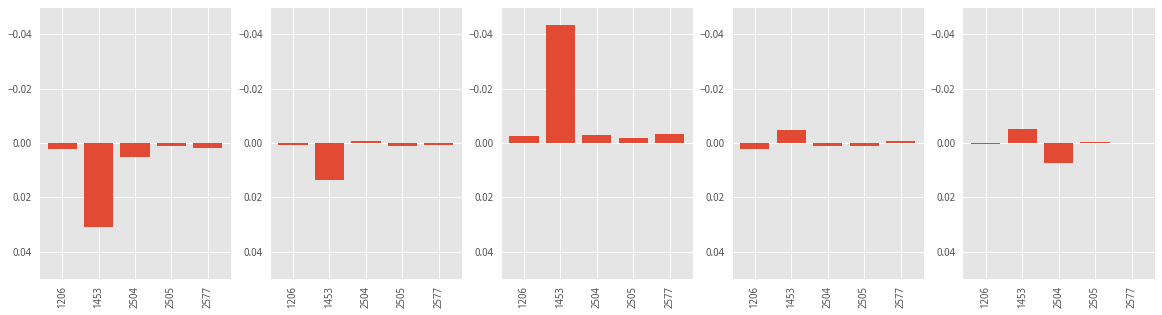

In [69]:
fig = plt.figure(figsize=(20,5))
for i, component in enumerate(svd_5.components_[important_components]):
    fig.add_subplot(1,5,1+i)
    plt.bar(list(range(5)), component[:5])
    plt.xticks(list(range(5)), X_tfidf.indices, rotation=90)
    plt.ylim(.05,-.05)

In [71]:
svd_results = list(zip(X_tfidf.indices,
                       np.sum(abs(svd_5.components_[important_components]),
                              axis=0)))

In [73]:
svd_results.sort(key=lambda x: abs(x[1]), reverse=True)
svd_results[:10]

[(4255, 1.8052909485133561),
 (3673, 1.6461083301976043),
 (5587, 1.0727483164567906),
 (1215, 1.0130260551363348),
 (5725, 1.0102918859635635),
 (2208, 0.78676678163418268),
 (4683, 0.73811892796655698),
 (3012, 0.73810823786800617),
 (4255, 0.68357835954117896),
 (6267, 0.58813374498471416)]

In [76]:
start = datetime.now()

rfe = RFE(Lasso(), n_features_to_select=10, verbose=1)
rfe.fit(X_tfidf, y_le)

end = datetime.now()
print(end - start)

Fitting estimator with 6369 features.
Fitting estimator with 6368 features.
Fitting estimator with 6367 features.
Fitting estimator with 6366 features.
Fitting estimator with 6365 features.
Fitting estimator with 6364 features.
Fitting estimator with 6363 features.
Fitting estimator with 6362 features.
Fitting estimator with 6361 features.
Fitting estimator with 6360 features.
Fitting estimator with 6359 features.
Fitting estimator with 6358 features.
Fitting estimator with 6357 features.
Fitting estimator with 6356 features.
Fitting estimator with 6355 features.
Fitting estimator with 6354 features.
Fitting estimator with 6353 features.
Fitting estimator with 6352 features.
Fitting estimator with 6351 features.
Fitting estimator with 6350 features.
Fitting estimator with 6349 features.
Fitting estimator with 6348 features.
Fitting estimator with 6347 features.
Fitting estimator with 6346 features.
Fitting estimator with 6345 features.
Fitting estimator with 6344 features.
Fitting esti

Fitting estimator with 6153 features.
Fitting estimator with 6152 features.
Fitting estimator with 6151 features.
Fitting estimator with 6150 features.
Fitting estimator with 6149 features.
Fitting estimator with 6148 features.
Fitting estimator with 6147 features.
Fitting estimator with 6146 features.
Fitting estimator with 6145 features.
Fitting estimator with 6144 features.
Fitting estimator with 6143 features.
Fitting estimator with 6142 features.
Fitting estimator with 6141 features.
Fitting estimator with 6140 features.
Fitting estimator with 6139 features.
Fitting estimator with 6138 features.
Fitting estimator with 6137 features.
Fitting estimator with 6136 features.
Fitting estimator with 6135 features.
Fitting estimator with 6134 features.
Fitting estimator with 6133 features.
Fitting estimator with 6132 features.
Fitting estimator with 6131 features.
Fitting estimator with 6130 features.
Fitting estimator with 6129 features.
Fitting estimator with 6128 features.
Fitting esti

Fitting estimator with 5937 features.
Fitting estimator with 5936 features.
Fitting estimator with 5935 features.
Fitting estimator with 5934 features.
Fitting estimator with 5933 features.
Fitting estimator with 5932 features.
Fitting estimator with 5931 features.
Fitting estimator with 5930 features.
Fitting estimator with 5929 features.
Fitting estimator with 5928 features.
Fitting estimator with 5927 features.
Fitting estimator with 5926 features.
Fitting estimator with 5925 features.
Fitting estimator with 5924 features.
Fitting estimator with 5923 features.
Fitting estimator with 5922 features.
Fitting estimator with 5921 features.
Fitting estimator with 5920 features.
Fitting estimator with 5919 features.
Fitting estimator with 5918 features.
Fitting estimator with 5917 features.
Fitting estimator with 5916 features.
Fitting estimator with 5915 features.
Fitting estimator with 5914 features.
Fitting estimator with 5913 features.
Fitting estimator with 5912 features.
Fitting esti

Fitting estimator with 5721 features.
Fitting estimator with 5720 features.
Fitting estimator with 5719 features.
Fitting estimator with 5718 features.
Fitting estimator with 5717 features.
Fitting estimator with 5716 features.
Fitting estimator with 5715 features.
Fitting estimator with 5714 features.
Fitting estimator with 5713 features.
Fitting estimator with 5712 features.
Fitting estimator with 5711 features.
Fitting estimator with 5710 features.
Fitting estimator with 5709 features.
Fitting estimator with 5708 features.
Fitting estimator with 5707 features.
Fitting estimator with 5706 features.
Fitting estimator with 5705 features.
Fitting estimator with 5704 features.
Fitting estimator with 5703 features.
Fitting estimator with 5702 features.
Fitting estimator with 5701 features.
Fitting estimator with 5700 features.
Fitting estimator with 5699 features.
Fitting estimator with 5698 features.
Fitting estimator with 5697 features.
Fitting estimator with 5696 features.
Fitting esti

Fitting estimator with 5505 features.
Fitting estimator with 5504 features.
Fitting estimator with 5503 features.
Fitting estimator with 5502 features.
Fitting estimator with 5501 features.
Fitting estimator with 5500 features.
Fitting estimator with 5499 features.
Fitting estimator with 5498 features.
Fitting estimator with 5497 features.
Fitting estimator with 5496 features.
Fitting estimator with 5495 features.
Fitting estimator with 5494 features.
Fitting estimator with 5493 features.
Fitting estimator with 5492 features.
Fitting estimator with 5491 features.
Fitting estimator with 5490 features.
Fitting estimator with 5489 features.
Fitting estimator with 5488 features.
Fitting estimator with 5487 features.
Fitting estimator with 5486 features.
Fitting estimator with 5485 features.
Fitting estimator with 5484 features.
Fitting estimator with 5483 features.
Fitting estimator with 5482 features.
Fitting estimator with 5481 features.
Fitting estimator with 5480 features.
Fitting esti

Fitting estimator with 5289 features.
Fitting estimator with 5288 features.
Fitting estimator with 5287 features.
Fitting estimator with 5286 features.
Fitting estimator with 5285 features.
Fitting estimator with 5284 features.
Fitting estimator with 5283 features.
Fitting estimator with 5282 features.
Fitting estimator with 5281 features.
Fitting estimator with 5280 features.
Fitting estimator with 5279 features.
Fitting estimator with 5278 features.
Fitting estimator with 5277 features.
Fitting estimator with 5276 features.
Fitting estimator with 5275 features.
Fitting estimator with 5274 features.
Fitting estimator with 5273 features.
Fitting estimator with 5272 features.
Fitting estimator with 5271 features.
Fitting estimator with 5270 features.
Fitting estimator with 5269 features.
Fitting estimator with 5268 features.
Fitting estimator with 5267 features.
Fitting estimator with 5266 features.
Fitting estimator with 5265 features.
Fitting estimator with 5264 features.
Fitting esti

Fitting estimator with 5073 features.
Fitting estimator with 5072 features.
Fitting estimator with 5071 features.
Fitting estimator with 5070 features.
Fitting estimator with 5069 features.
Fitting estimator with 5068 features.
Fitting estimator with 5067 features.
Fitting estimator with 5066 features.
Fitting estimator with 5065 features.
Fitting estimator with 5064 features.
Fitting estimator with 5063 features.
Fitting estimator with 5062 features.
Fitting estimator with 5061 features.
Fitting estimator with 5060 features.
Fitting estimator with 5059 features.
Fitting estimator with 5058 features.
Fitting estimator with 5057 features.
Fitting estimator with 5056 features.
Fitting estimator with 5055 features.
Fitting estimator with 5054 features.
Fitting estimator with 5053 features.
Fitting estimator with 5052 features.
Fitting estimator with 5051 features.
Fitting estimator with 5050 features.
Fitting estimator with 5049 features.
Fitting estimator with 5048 features.
Fitting esti

Fitting estimator with 4857 features.
Fitting estimator with 4856 features.
Fitting estimator with 4855 features.
Fitting estimator with 4854 features.
Fitting estimator with 4853 features.
Fitting estimator with 4852 features.
Fitting estimator with 4851 features.
Fitting estimator with 4850 features.
Fitting estimator with 4849 features.
Fitting estimator with 4848 features.
Fitting estimator with 4847 features.
Fitting estimator with 4846 features.
Fitting estimator with 4845 features.
Fitting estimator with 4844 features.
Fitting estimator with 4843 features.
Fitting estimator with 4842 features.
Fitting estimator with 4841 features.
Fitting estimator with 4840 features.
Fitting estimator with 4839 features.
Fitting estimator with 4838 features.
Fitting estimator with 4837 features.
Fitting estimator with 4836 features.
Fitting estimator with 4835 features.
Fitting estimator with 4834 features.
Fitting estimator with 4833 features.
Fitting estimator with 4832 features.
Fitting esti

Fitting estimator with 4641 features.
Fitting estimator with 4640 features.
Fitting estimator with 4639 features.
Fitting estimator with 4638 features.
Fitting estimator with 4637 features.
Fitting estimator with 4636 features.
Fitting estimator with 4635 features.
Fitting estimator with 4634 features.
Fitting estimator with 4633 features.
Fitting estimator with 4632 features.
Fitting estimator with 4631 features.
Fitting estimator with 4630 features.
Fitting estimator with 4629 features.
Fitting estimator with 4628 features.
Fitting estimator with 4627 features.
Fitting estimator with 4626 features.
Fitting estimator with 4625 features.
Fitting estimator with 4624 features.
Fitting estimator with 4623 features.
Fitting estimator with 4622 features.
Fitting estimator with 4621 features.
Fitting estimator with 4620 features.
Fitting estimator with 4619 features.
Fitting estimator with 4618 features.
Fitting estimator with 4617 features.
Fitting estimator with 4616 features.
Fitting esti

Fitting estimator with 4425 features.
Fitting estimator with 4424 features.
Fitting estimator with 4423 features.
Fitting estimator with 4422 features.
Fitting estimator with 4421 features.
Fitting estimator with 4420 features.
Fitting estimator with 4419 features.
Fitting estimator with 4418 features.
Fitting estimator with 4417 features.
Fitting estimator with 4416 features.
Fitting estimator with 4415 features.
Fitting estimator with 4414 features.
Fitting estimator with 4413 features.
Fitting estimator with 4412 features.
Fitting estimator with 4411 features.
Fitting estimator with 4410 features.
Fitting estimator with 4409 features.
Fitting estimator with 4408 features.
Fitting estimator with 4407 features.
Fitting estimator with 4406 features.
Fitting estimator with 4405 features.
Fitting estimator with 4404 features.
Fitting estimator with 4403 features.
Fitting estimator with 4402 features.
Fitting estimator with 4401 features.
Fitting estimator with 4400 features.
Fitting esti

Fitting estimator with 4209 features.
Fitting estimator with 4208 features.
Fitting estimator with 4207 features.
Fitting estimator with 4206 features.
Fitting estimator with 4205 features.
Fitting estimator with 4204 features.
Fitting estimator with 4203 features.
Fitting estimator with 4202 features.
Fitting estimator with 4201 features.
Fitting estimator with 4200 features.
Fitting estimator with 4199 features.
Fitting estimator with 4198 features.
Fitting estimator with 4197 features.
Fitting estimator with 4196 features.
Fitting estimator with 4195 features.
Fitting estimator with 4194 features.
Fitting estimator with 4193 features.
Fitting estimator with 4192 features.
Fitting estimator with 4191 features.
Fitting estimator with 4190 features.
Fitting estimator with 4189 features.
Fitting estimator with 4188 features.
Fitting estimator with 4187 features.
Fitting estimator with 4186 features.
Fitting estimator with 4185 features.
Fitting estimator with 4184 features.
Fitting esti

Fitting estimator with 3993 features.
Fitting estimator with 3992 features.
Fitting estimator with 3991 features.
Fitting estimator with 3990 features.
Fitting estimator with 3989 features.
Fitting estimator with 3988 features.
Fitting estimator with 3987 features.
Fitting estimator with 3986 features.
Fitting estimator with 3985 features.
Fitting estimator with 3984 features.
Fitting estimator with 3983 features.
Fitting estimator with 3982 features.
Fitting estimator with 3981 features.
Fitting estimator with 3980 features.
Fitting estimator with 3979 features.
Fitting estimator with 3978 features.
Fitting estimator with 3977 features.
Fitting estimator with 3976 features.
Fitting estimator with 3975 features.
Fitting estimator with 3974 features.
Fitting estimator with 3973 features.
Fitting estimator with 3972 features.
Fitting estimator with 3971 features.
Fitting estimator with 3970 features.
Fitting estimator with 3969 features.
Fitting estimator with 3968 features.
Fitting esti

Fitting estimator with 3777 features.
Fitting estimator with 3776 features.
Fitting estimator with 3775 features.
Fitting estimator with 3774 features.
Fitting estimator with 3773 features.
Fitting estimator with 3772 features.
Fitting estimator with 3771 features.
Fitting estimator with 3770 features.
Fitting estimator with 3769 features.
Fitting estimator with 3768 features.
Fitting estimator with 3767 features.
Fitting estimator with 3766 features.
Fitting estimator with 3765 features.
Fitting estimator with 3764 features.
Fitting estimator with 3763 features.
Fitting estimator with 3762 features.
Fitting estimator with 3761 features.
Fitting estimator with 3760 features.
Fitting estimator with 3759 features.
Fitting estimator with 3758 features.
Fitting estimator with 3757 features.
Fitting estimator with 3756 features.
Fitting estimator with 3755 features.
Fitting estimator with 3754 features.
Fitting estimator with 3753 features.
Fitting estimator with 3752 features.
Fitting esti

KeyboardInterrupt: 

In [ ]:
rfe_results = list(zip(X_tfidf.indices, rfe.estimator_.coef_))
rfe_results.sort(key=lambda x: abs(x[1]), reverse=True)
rfe_results

In [ ]:
pca_results = list(zip(X_tfidf.indices,
                       np.sum(abs(PCA.components_[important_components]),
                              axis=0)))

In [ ]:
#better than running nhl_data.corr(), show visually instead:
from matplotlib import pyplot
pyplot.figure(figsize=(8,8))

corr = nhl_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')